In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 12.0]

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

In [4]:
from pandas_summary import DataFrameSummary

In [5]:
# import my Finance Analysis Tools (fat)
import finance as fat

In [6]:
# full imports of fastai fail on windows, so just import some of it for now
from fastai.structured import add_datepart, apply_cats, proc_df

<b>Don't run this on windows, only on paperspace...

In [7]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

In [8]:
TICKER = 'IAU'
PATH = f'data/{TICKER}-test'

## Load basic data

In [9]:
data = fat.create_dl_ticker_features(TICKER)

Loaded data for IAU: 2005-01-28 to 2018-02-20.


## Create Features

In [10]:
data = fat.create_dl_features(data)

We'll also add google trends for searches for  "gold price usd"

In [11]:
search = "gold price usd"
trends = fat.get_google_trends_df(data, search)

In [12]:
trends.tail()

,gold price usd,Days since updated gold price usd
date,,
2018-01-28,82.0,27
2018-01-29,82.0,28
2018-01-30,82.0,29
2018-01-31,82.0,30
2018-02-01,81.0,0


In [13]:
data = pd.DataFrame.join(data, trends)

In [14]:
data = data.dropna()
data[-14:].T

Date,2018-01-12 00:00:00,2018-01-16 00:00:00,2018-01-17 00:00:00,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-24 00:00:00,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-01-29 00:00:00,2018-01-30 00:00:00,2018-01-31 00:00:00,2018-02-01 00:00:00
Open,12.76,12.82,12.84,12.79,12.8,12.81,12.81,13,13.03,12.98,12.92,12.94,12.9,12.88
High,12.87,12.87,12.88,12.8,12.83,12.83,12.89,13.08,13.11,13.01,12.92,12.95,12.94,12.97
Low,12.73,12.79,12.74,12.73,12.78,12.78,12.78,12.98,12.89,12.95,12.84,12.83,12.79,12.86
Close,12.86,12.86,12.77,12.75,12.78,12.81,12.88,13.05,12.94,12.97,12.88,12.83,12.92,12.97
Adj Close,12.86,12.86,12.77,12.75,12.78,12.81,12.88,13.05,12.94,12.97,12.88,12.83,12.92,12.97
Volume,13305400,7295900,22220900,18560300,6918900,6715900,11162200,15587600,19944800,14350800,7974300,9532200,20848500,13352000
Daily Range,0.14,0.08,0.14,0.07,0.05,0.05,0.11,0.1,0.22,0.06,0.08,0.12,0.15,0.11
Daily Gain,0.1,0.04,-0.07,-0.04,-0.02,0,0.07,0.05,-0.09,-0.01,-0.04,-0.11,0.02,0.09
Close Higher than Open,True,True,False,False,False,False,True,True,False,False,False,False,True,True
Close Lower than Open,False,False,True,True,True,False,False,False,True,True,True,True,False,False


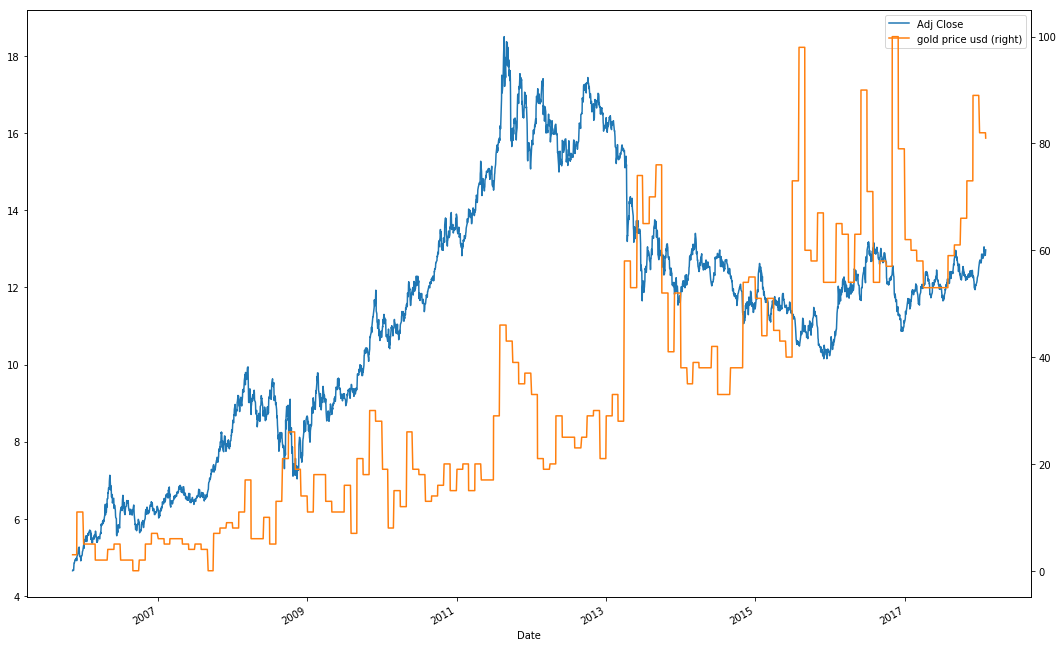

In [15]:
plot_data = data[['Adj Close', search]]
plot_data.plot(secondary_y = [search])

We're going to try to be predicting whether price will close higher tomorrow, so add a column with that info.

In [89]:
dep = 'Will Close Higher Tomorrow'
data[dep] = data['Closed Higher than Prev Close'].shift(-1)
data[dep] = data[dep].astype('float32')*1000
data[dep] = data[dep] + 1

In [90]:
data = data.dropna()
data.tail().T

Date,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-24 00:00:00
Open,12.79,12.8,12.81,12.81,13
High,12.8,12.83,12.83,12.89,13.08
Low,12.73,12.78,12.78,12.78,12.98
Close,12.75,12.78,12.81,12.88,13.05
Adj Close,12.75,12.78,12.81,12.88,13.05
Volume,18560300,6918900,6715900,11162200,15587600
Daily Range,0.07,0.05,0.05,0.11,0.1
Daily Gain,-0.04,-0.02,0,0.07,0.05
Close Higher than Open,False,False,False,True,True
Close Lower than Open,True,True,False,False,False


In [91]:
DataFrameSummary(data).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Open,3071,11.2722,3.14125,4.659,8.986,11.77,12.89,18.51,3071,1608,0,0%,numeric
High,3071,11.3316,3.15191,4.68,9.0685,11.82,12.96,18.63,3071,1624,0,0%,numeric
Low,3071,11.2067,3.12907,4.644,8.929,11.71,12.84,18.25,3071,1632,0,0%,numeric
Close,3071,11.2717,3.1414,4.653,9.003,11.76,12.89,18.5,3071,1633,0,0%,numeric
Adj Close,3071,11.2717,3.1414,4.653,9.003,11.76,12.89,18.5,3071,1633,0,0%,numeric
Volume,3071,4.94826e+06,4.56877e+06,135000,2.111e+06,3.8301e+06,6.30375e+06,6.99811e+07,3071,2900,0,0%,numeric
Daily Range,3071,0.124947,0.0875922,0.02,0.07,0.1,0.15,1.04,3071,692,0,0%,numeric
Daily Gain,3071,-0.000554869,0.0919774,-0.890001,-0.04,0,0.04,0.838,3071,808,0,0%,numeric
Close Higher than Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3071,2,0,0%,bool
Close Lower than Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3071,2,0,0%,bool


In [92]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Range',
       'Daily Gain', 'Close Higher than Open', 'Close Lower than Open',
       'High was Open', 'High was Close', 'Low was Open', 'Low was Close',
       'Closed Higher than Prev Close', 'Closed Lower than Prev Close',
       'Adj Close SMA3', 'Adj Close SMA5', 'Adj Close SMA10',
       'Adj Close SMA20', 'Adj Close SMA50', 'Adj Close SMA100',
       'Adj Close SMA200', 'pct diff Adj Close SMA3',
       'pct diff Adj Close SMA5', 'pct diff Adj Close SMA10',
       'pct diff Adj Close SMA20', 'pct diff Adj Close SMA50',
       'pct diff Adj Close SMA100', 'pct diff Adj Close SMA200', 'Volume SMA3',
       'Volume SMA5', 'Volume SMA10', 'Volume SMA20', 'Volume SMA50',
       'Volume SMA100', 'Volume SMA200', 'pct diff Volume SMA3',
       'pct diff Volume SMA5', 'pct diff Volume SMA10',
       'pct diff Volume SMA20', 'pct diff Volume SMA50',
       'pct diff Volume SMA100', 'pct diff Volume SMA200',
       'Day

Break the columns up into "category variables" and "continuous variables".

In [93]:
cat_vars = ['Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Days since updated gold price usd',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
            'Close Higher than Open', 'Close Lower than Open', 'High was Open', 'High was Close', 'Low was Open', 
            'Low was Close', 'Closed Higher than Prev Close', 'Closed Lower than Prev Close', 'Days Since Trading', 
            'Days Until Trading']

contin_vars = ['Year', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Range',
               'Daily Gain','gold price usd', 'Elapsed',
               'Adj Close SMA3', 'Adj Close SMA5', 'Adj Close SMA10', 'Adj Close SMA20', 'Adj Close SMA50', 
               'Adj Close SMA100', 'Adj Close SMA200',
               'pct diff Adj Close SMA3', 'pct diff Adj Close SMA5', 'pct diff Adj Close SMA10', 'pct diff Adj Close SMA20', 
               'pct diff Adj Close SMA50', 'pct diff Adj Close SMA100', 'pct diff Adj Close SMA200', 'Volume SMA3', 
               'Volume SMA5', 'Volume SMA10', 'Volume SMA20', 'Volume SMA50', 'Volume SMA100', 'Volume SMA200', 
               'pct diff Volume SMA3', 'pct diff Volume SMA5', 'pct diff Volume SMA10', 'pct diff Volume SMA20', 
               'pct diff Volume SMA50', 'pct diff Volume SMA100', 'pct diff Volume SMA200']

In [94]:
print(f'len(cat_vars) = {len(cat_vars)}')
print(f'len(contin_vars) = {len(contin_vars)}')
print(f'len(data.columns) = {len(data.columns)}')
assert(len(data.columns) == (len(cat_vars) + len(contin_vars) + 1))

len(cat_vars) = 22
len(contin_vars) = 39
len(data.columns) = 62


Split data into train and test sets.

In [95]:
data_len = len(data)
train_len = int(data_len * .8)
data_train = data[:train_len].copy()
data_test = data[train_len:].copy()

In [96]:
data_train = data_train.reset_index()
data_train = data_train[cat_vars+contin_vars+[dep, 'Date']].copy()

In [97]:
data_train.tail().T

,2451,2452,2453,2454,2455
Month,8,8,8,8,8
Week,33,33,33,33,33
Day,10,11,12,13,14
Dayofweek,0,1,2,3,4
Dayofyear,222,223,224,225,226
Days since updated gold price usd,9,10,11,12,13
Is_month_end,False,False,False,False,False
Is_month_start,False,False,False,False,False
Is_quarter_end,False,False,False,False,False
Is_quarter_start,False,False,False,False,False


In [98]:
data_test[dep] = 0
data_test = data_test.reset_index()
data_test = data_test[cat_vars+contin_vars+[dep,'Date']].copy()

In [99]:
data_test.head().T

,0,1,2,3,4
Month,8,8,8,8,8
Week,34,34,34,34,34
Day,17,18,19,20,21
Dayofweek,0,1,2,3,4
Dayofyear,229,230,231,232,233
Days since updated gold price usd,16,17,18,19,20
Is_month_end,False,False,False,False,False
Is_month_start,False,False,False,False,False
Is_quarter_end,False,False,False,False,False
Is_quarter_start,False,False,False,False,False


In [100]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [101]:
for v in cat_vars: 
    data_train[v] = data_train[v].astype('category').cat.as_ordered()

In [102]:
apply_cats(data_test, data_train)

In [103]:
for v in contin_vars:
    data_train[v] = data_train[v].astype('float32')
    data_test[v] = data_test[v].astype('float32')

In [104]:
DataFrameSummary(data_train).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,12,0,0%,categorical
Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,53,0,0%,categorical
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,31,0,0%,categorical
Dayofweek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,5,0,0%,categorical
Dayofyear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,365,0,0%,categorical
Days since updated gold price usd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,31,0,0%,categorical
Is_month_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,2,0,0%,bool
Is_month_start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,2,0,0%,bool
Is_quarter_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,2,0,0%,bool
Is_quarter_start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456,2,0,0%,bool


We can now process our data...

In [105]:
# we get a AttributeError here if we don't have skip_flds = ['Date']
data_train = data_train.set_index('Date')
df_train, y, nas, mapper = proc_df(data_train, dep, do_scale=True)
yl = np.log(y)

In [106]:
df_train.head(2).T

Date,2005-11-10 00:00:00,2005-11-11 00:00:00
Month,11.000000,11.000000
Week,45.000000,45.000000
Day,10.000000,11.000000
Dayofweek,4.000000,5.000000
Dayofyear,313.000000,314.000000
Days since updated gold price usd,10.000000,11.000000
Is_month_end,1.000000,1.000000
Is_month_start,1.000000,1.000000
Is_quarter_end,1.000000,1.000000
Is_quarter_start,1.000000,1.000000


In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) on our web site.

One approach is to take the last 25% of rows (sorted by date) as our validation set.

In [107]:
train_ratio = 0.75
data_size = len(df_train)
train_size = int(data_size * train_ratio)
val_idx = list(range(train_size, data_size))

In [108]:
data_test = data_test.set_index('Date')
df_test, _, nas, mapper = proc_df(data_test, dep, do_scale=True,
                                  mapper=mapper, na_dict=nas)

In [109]:
#joined = joined.dropna()
#joined_test = joined_test.dropna()

## Deep Learning

We're ready to put together our models.

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [110]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

We can create a ModelData object directly from out data frame.

In [111]:
# before: bs=128, changed to bs=8 to get results while finding learning rate
# replaced yl.astype(np.float32) with y
md = ColumnarModelData.from_data_frame(PATH, val_idx, df_train, yl.astype(np.float32), cat_flds=cat_vars, bs=2,
                                       test_df=df_test)

Create categorical variables.

In [112]:
cat_sz = [(c, len(data_train[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('Month', 13),
 ('Week', 54),
 ('Day', 32),
 ('Dayofweek', 6),
 ('Dayofyear', 366),
 ('Days since updated gold price usd', 32),
 ('Is_month_end', 3),
 ('Is_month_start', 3),
 ('Is_quarter_end', 3),
 ('Is_quarter_start', 3),
 ('Is_year_end', 3),
 ('Is_year_start', 2),
 ('Close Higher than Open', 3),
 ('Close Lower than Open', 3),
 ('High was Open', 3),
 ('High was Close', 3),
 ('Low was Open', 3),
 ('Low was Close', 3),
 ('Closed Higher than Prev Close', 3),
 ('Closed Lower than Prev Close', 3),
 ('Days Since Trading', 6),
 ('Days Until Trading', 6)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [113]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(13, 7),
 (54, 27),
 (32, 16),
 (6, 3),
 (366, 50),
 (32, 16),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (2, 1),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (6, 3),
 (6, 3)]

Find learning rate.

In [114]:
m = md.get_learner(emb_szs, len(df_train.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [117]:
m.lr_find(1e-8,1e-3)
#m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      15.769153  13.412729 



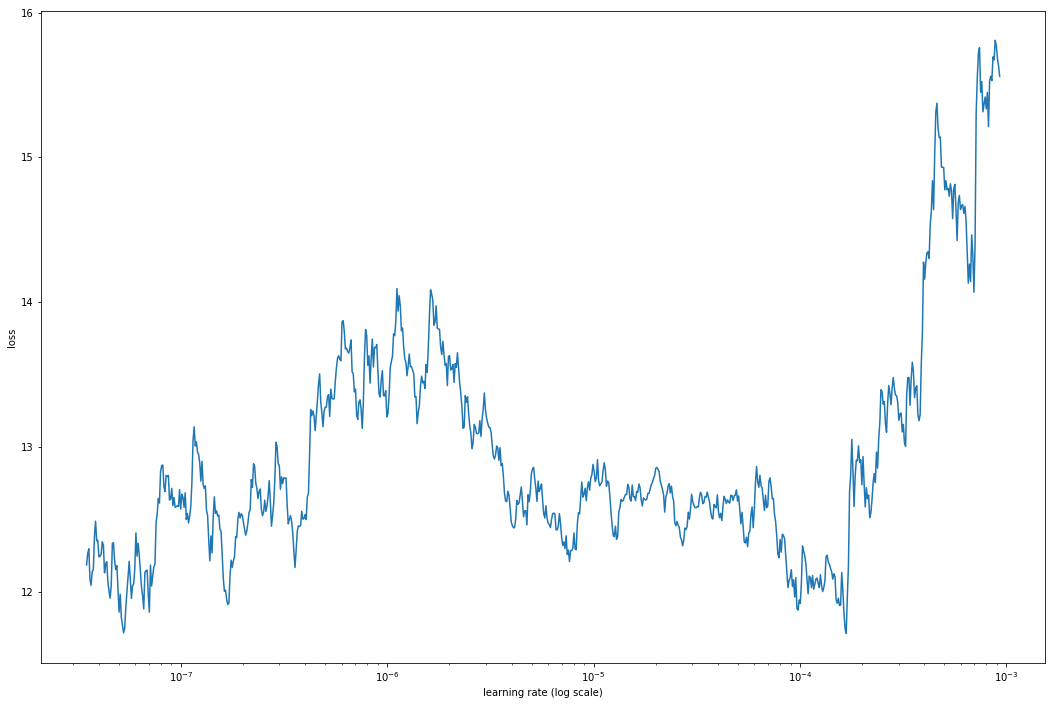

In [118]:
m.sched.plot(100)

### Sample

In [135]:
m = md.get_learner(emb_szs, len(df_train.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-4

In [137]:
m.fit(lr, 1, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                   
    0      12.298266  12.15647   29.952354 



[12.15647, 29.952353882225967]

In [126]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                   
    0      10.443135  13.881408  73.123022 
    1      9.906255   14.320021  97.783044                   
    2      8.863884   14.45536   109.400176                  
    3      8.505871   15.53411   164.936817                  
    4      7.011992   15.644485  176.45632                   



[15.644485, 176.45632003067468]

In [131]:
m.fit(lr, 4, metrics=[exp_rmspe], cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                   
    0      10.217645  13.58621   63.270252 
    1      9.615884   14.475816  94.358302                   
    2      9.162285   14.587426  101.11033                   
    3      7.662435   14.643986  108.663248                  
    4      8.596275   14.862194  129.829399                  
    5      7.484748   15.320626  152.503009                  
    6      8.020378   16.140837  217.6265                    
    7      6.182083   15.496716  176.530103                  



[15.496716, 176.53010262641178]

In [123]:
m.fit(lr, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      6.168644   16.71699  
    1      5.733291   18.441265                              
    2      5.288075   17.279215                              



[17.279215]

In [138]:
m.save('val-29')

In [139]:
m.load('val-29')

In [140]:
x,y=m.predict_with_targs()

In [141]:
exp_rmspe(x,y)

42.17757985218569

In [142]:
pred_test=m.predict(is_test=True)

In [143]:
pred_test = np.exp(pred_test)

In [144]:
data_test[dep]=pred_test

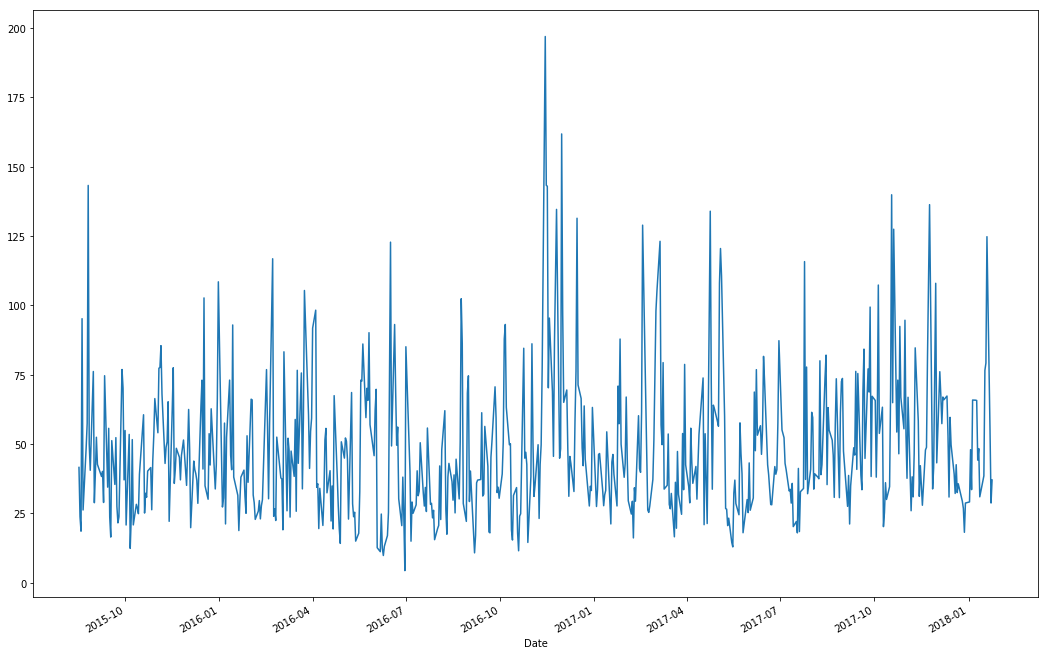

In [145]:
data_test[dep].plot()

In [148]:
# prediction are made for the next day ('Date'+1), so shift data so that date is proper date for value predicted 
predict = pd.DataFrame(data_test[dep].shift(1))
predict.columns = [f'Predicted {TICKER} Higher Close']
predict[f'Actual {TICKER} Higher Close'] = data['Closed Higher than Prev Close']
predict = predict.dropna()

In [149]:
filename = f'{PATH}/{TICKER}-predictions-{dt.datetime.now():%Y%m%d-%H%M%S}.csv'
predict.to_csv(filename)

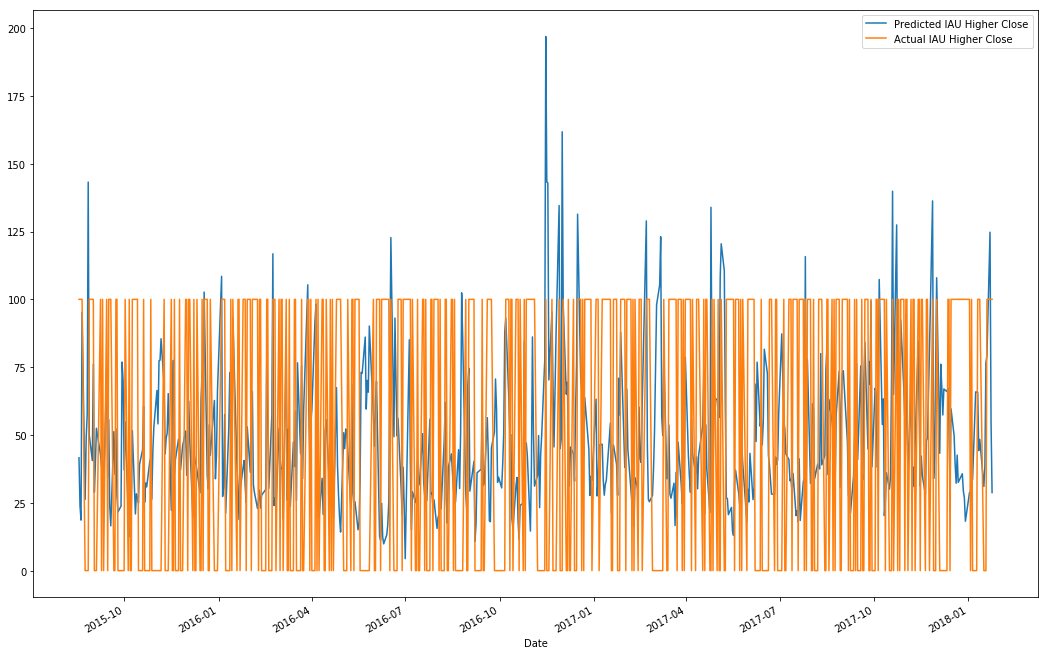

In [151]:
predict[f'Actual {TICKER} Higher Close'] = predict[f'Actual {TICKER} Higher Close'] * 100.0
predict.plot()

In [ ]:
rmse = np.sqrt(mean_squared_error(predict[0], predict[1]))
rmspe = rmse / len(predict)
#ex_rmspe = np.(rmspe)
print(f'RMSE = {rmse}')
print(f'RMSPE = {rmspe}')
#print(f'exp RMSPE = {ex_rmspe}')